<a href="https://colab.research.google.com/github/arifhasancsecu/Linear_Regression_Algorithm/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#Loading iris dataset
iris=sns.load_dataset('iris')

In [ ]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
print(iris.groupby('species').size())

species
setosa        50
versicolor    50
virginica     50
dtype: int64


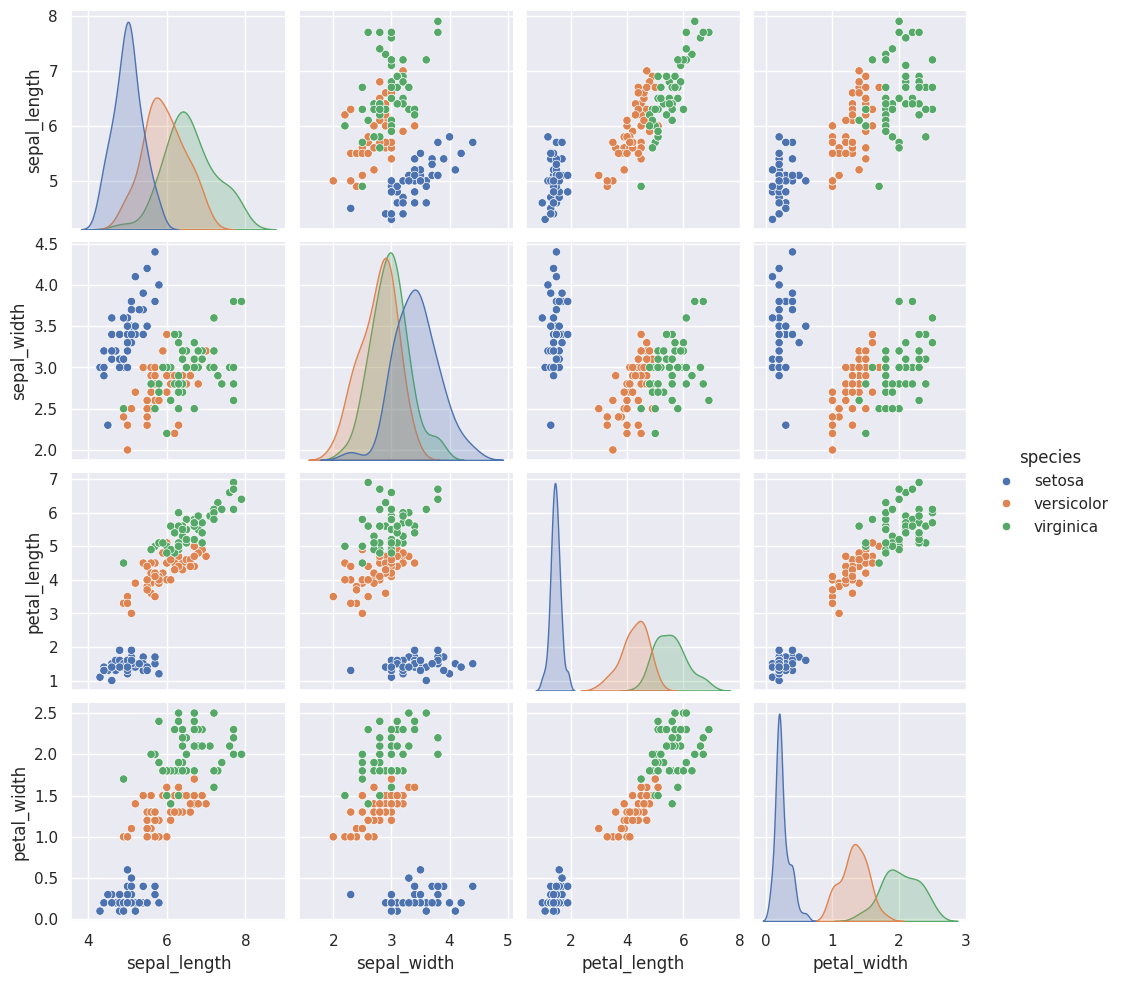

In [ ]:
sns.pairplot(data=iris,hue='species')

<Axes: >

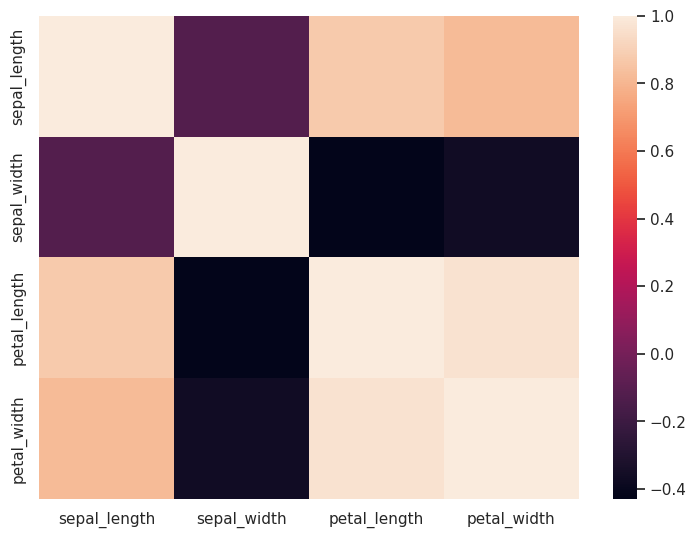

In [ ]:
sns.heatmap(iris.corr())

<Axes: xlabel='species', ylabel='petal_length'>

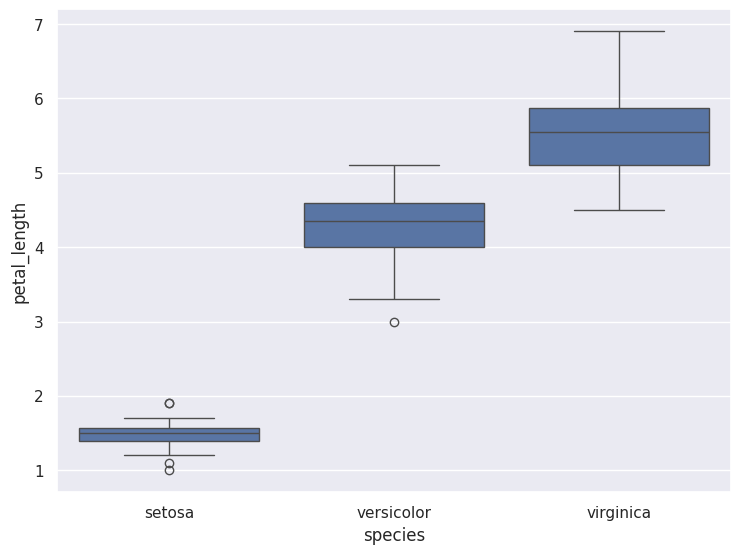

In [ ]:
sns.boxplot(x='species', y='petal_length', data=iris)


<Axes: xlabel='species', ylabel='petal_length'>

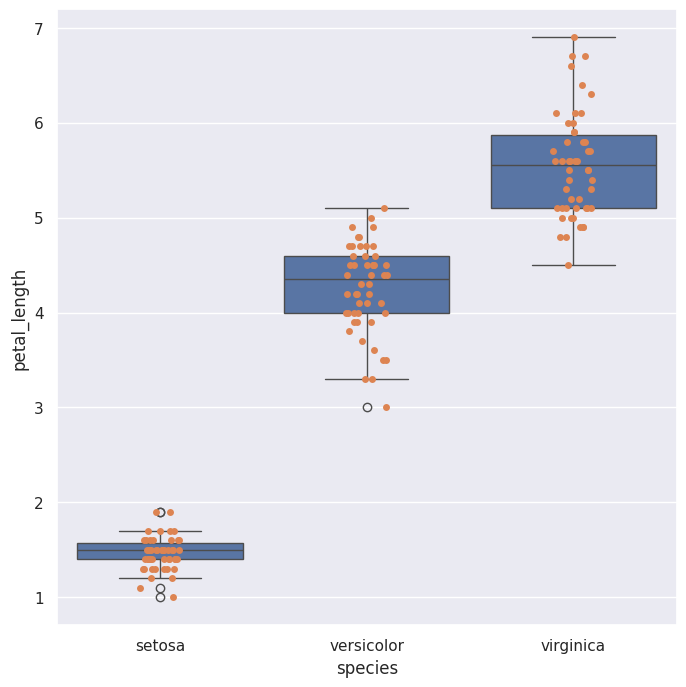

In [ ]:
#using jitter so that all the points don't fall in single vertical lines above species
plt.figure(figsize=(8,8))
sns.boxplot(data=iris, x = 'species',y = 'petal_length')
sns.stripplot(data=iris, x='species', y='petal_length', jitter=True, edgecolor='green')

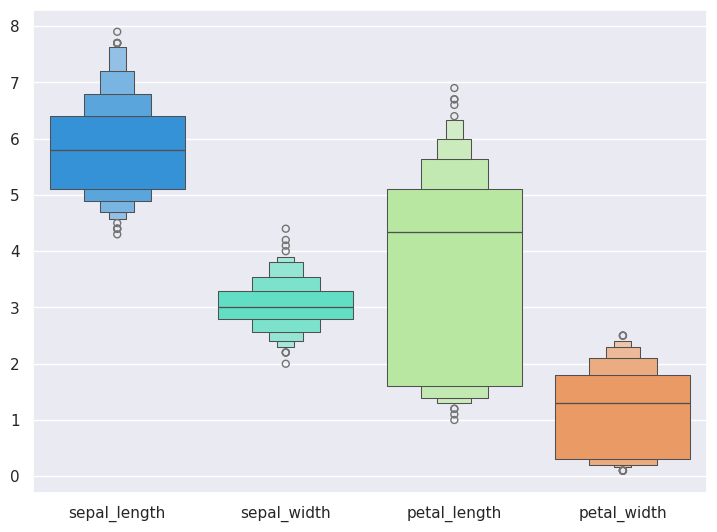

In [ ]:
sns.boxenplot(data=iris,palette='rainbow')
plt.show()

# Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
import matplotlib.pyplot as plt


In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()


In [ ]:
print(iris.DESCR)


.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [ ]:
y=iris.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
x=iris.data
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=101)


In [ ]:
clf=LinearRegression()


In [ ]:
clf.fit(x_train,y_train)


LinearRegression()

In [ ]:
y_pred=clf.predict(x_test)
y_pred

array([-1.82005490e-01, -1.73640745e-02,  2.44852453e-01,  1.52859194e+00,
        1.20130940e+00,  1.62007926e+00,  1.40751724e+00,  1.22457535e+00,
        1.72881726e+00, -5.33043993e-03,  1.76143721e+00, -2.03368818e-01,
        7.09794259e-02,  1.94228548e+00,  1.60082788e+00,  1.14231285e+00,
        1.15557655e+00,  1.17588410e+00, -8.32427749e-03,  1.47873408e+00,
        1.04058923e+00, -9.56869975e-02,  1.18599163e+00,  1.18503991e+00,
        1.15655135e+00,  1.08542227e+00,  9.35883319e-01,  2.09792664e+00,
        2.00773361e-02,  1.55174015e-01,  1.99931409e+00,  1.20224876e+00,
        1.66993196e+00,  1.07215300e+00,  1.85901789e+00,  1.23583794e+00,
        1.30397835e+00,  1.29077810e+00,  1.20532995e+00,  2.03282149e+00,
        5.88473025e-02, -1.16006505e-01,  1.91085070e-02,  1.50422798e+00,
        1.36092640e+00, -8.15533620e-02,  1.90271419e+00,  9.64384234e-01,
       -2.30219590e-04,  9.27794831e-01,  1.03857020e+00,  2.06175406e-01,
        1.75835045e+00, -

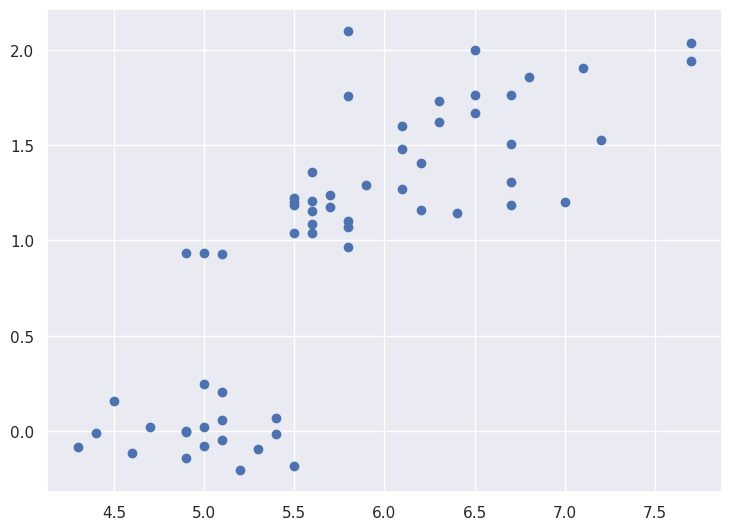

In [ ]:
#sepal length
plt.scatter(x_test[:,0],y_pred)
plt.show()

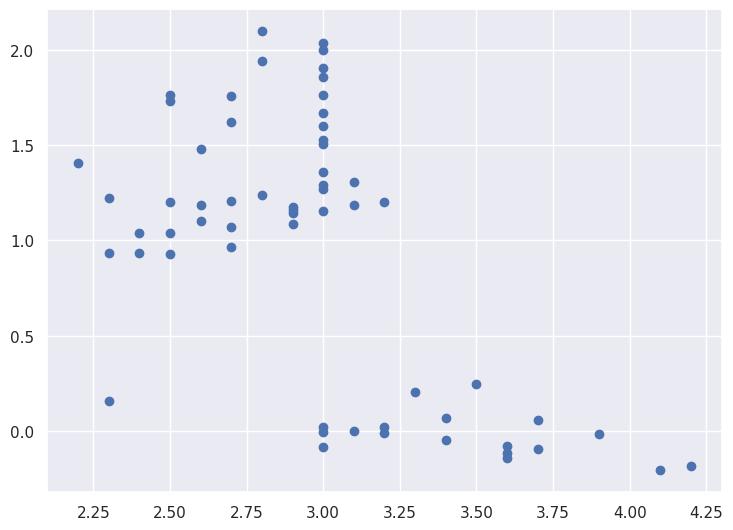

In [ ]:
#sepal width
plt.scatter(x_test[:,1],y_pred)
plt.show()

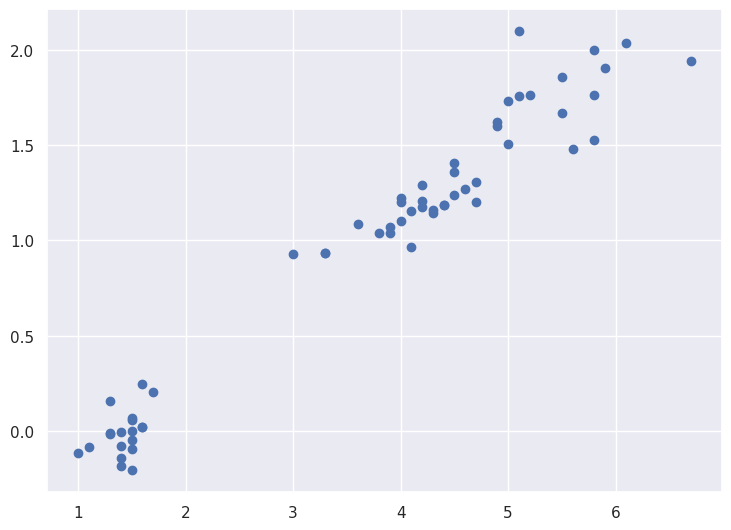

In [ ]:
#petal length
plt.scatter(x_test[:,2],y_pred)
plt.show()

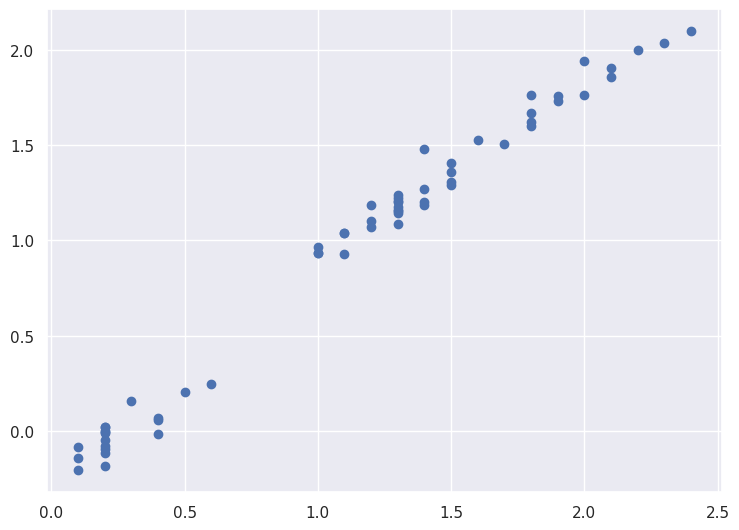

In [ ]:
#petal width
plt.scatter(x_test[:,3],y_pred)
plt.show()